In [3]:
import numpy as np

c = 1
kB = 1

In [4]:
def sample_velocity(theta):
    """
    Samples the dimensionless momentum u = p/(m * c) Maxwell-Jüttner
    distribution via rejection sampling.
    """
    while True:

        velocity = np.random.exponential(scale = 3 * theta + 1)
        v_square = velocity * velocity

        gamma = np.sqrt(1 + v_square)

        target_distr = v_square * np.exp(-gamma / theta)
        easy_to_sample_distr = v_square * np.exp(-velocity / (theta + 1e-12))

        if np.random.rand() < target_distr / easy_to_sample_distr:
            return velocity

In [5]:
def random_sph_unit_vec():
    z = 2 * np.random.rand() - 1
    phi = 2 * np.pi*np.random.rand()

    r = np.sqrt(1 - z * z)

    return np.array([r * np.cos(phi), r * np.sin(phi), z])

In [6]:
def sample_maxwell_jüttner_momentum(mass, temperature, sample_size = 1):
    theta = kB * temperature / (mass * c * c)

    momenta = np.zeros((sample_size,3))

    for i in range(sample_size):
        velocity = sample_velocity(theta)
        direction = random_sph_unit_vec()

        p = mass * c * velocity
        momenta[i] = p * direction

    return momenta

In [33]:
momenta = sample_maxwell_jüttner_momentum(0.138, 100, sample_size = 10000)

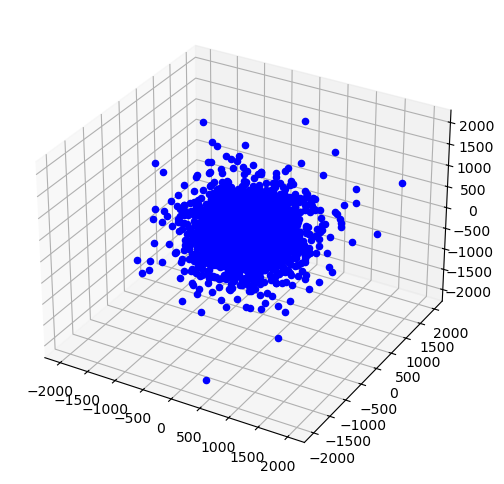

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for x, y, z in momenta:
    #ax.quiver(0.0, 0.0, 0.0, x, y, z)
    ax.scatter(x, y, z, c='blue')

axis_max = np.max(momenta)

ax.set_xlim([-axis_max, axis_max])
ax.set_ylim([-axis_max, axis_max])
ax.set_zlim([-axis_max, axis_max])

plt.show()